In [1]:
from fish_helpers import *
import time
from functools import partial
from multiprocessing import Pool
import pylab as pl
from IPython import display
import tqdm.notebook as tqdm
import math
import random
import operator
import sys
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib._color_data as mcd
from sklearn.metrics.pairwise import euclidean_distances
base_path = '/bigstore/GeneralStorage/Zach/CSI/Hippocampus/'
if not os.path.exists(base_path):
    os.mkdir(base_path)

Preprocess matrix
-SCVI
-Prefilter genes (Low variation/explained varience)
Classifier
-defined: cost(KNN avg % Accurate)
-dendogram: cost(Weighted 1NN)
Imputation
-cost(KNN avg avg distance in Z)


In [ ]:
# Load Data

In [5]:
latent = pd.read_csv('/bigstore/binfo/mouse/Hippocampus/TBI.SHAM.countdata.with.celltypes.latent.csv.gz',index_col=0)
latent = latent.astype('float32')
latent.head()

0         1         2         3         4  \
S1Hip_CCTTGCCACACT_ODC  0.392325 -0.771534 -1.173959  1.528997  0.412008   
S1Hip_TTCTATTCGTAG_ODC  0.250088 -1.054843 -1.740179  1.171318  0.322338   
S1Hip_TTGGGCCCACCG_ODC -0.085551 -0.430284 -0.918166  1.508396  0.936266   
S1Hip_ATGTACGCCGTG_ODC  0.617349 -0.243066 -1.808540  1.689078  0.312485   
S1Hip_CCAGAATAATTT_ODC  0.390005 -0.831750 -0.980679  1.453218  1.143527   

                               5         6         7         8         9  
S1Hip_CCTTGCCACACT_ODC -0.678457 -0.110804  1.066432  1.334158 -0.022135  
S1Hip_TTCTATTCGTAG_ODC -1.180409  0.454631  0.070974  1.275095 -0.147270  
S1Hip_TTGGGCCCACCG_ODC -0.716988  0.468579  0.686355  1.113158 -0.313047  
S1Hip_ATGTACGCCGTG_ODC -0.664520  0.216020  0.383360  0.573401  0.371106  
S1Hip_CCAGAATAATTT_ODC -0.850921  0.269316  0.324075  0.899953  0.021807

In [6]:
SCMatrix = pd.read_csv('/bigstore/binfo/mouse/Hippocampus/TBI.SHAM.countdata.with.celltypes.relavent_normalized_df.csv',index_col=0)
SCMatrix = SCMatrix.astype('float32')
SCMatrix.head()

S1Hip_CCTTGCCACACT_ODC  S1Hip_TTCTATTCGTAG_ODC  \
Reps1                44.327400               36.272220   
Soga3               123.398349              109.782974   
Rps15               618.085382              528.949604   
Anks1b              459.308503              522.124406   
Eea1                112.507296               80.928352   

        S1Hip_TTGGGCCCACCG_ODC  S1Hip_ATGTACGCCGTG_ODC  \
Reps1                32.044081               49.884129   
Soga3               136.354924              148.335690   
Rps15               571.626879              491.853862   
Anks1b              609.744049              543.028407   
Eea1                 89.131878              115.719784   

        S1Hip_CCAGAATAATTT_ODC  S1Hip_CCGCTCAAGTCC_ODC  \
Reps1                44.007866               63.792635   
Soga3               152.976922              162.084616   
Rps15               525.095733              691.627967   
Anks1b              531.675178              521.985290   
Eea1                100.736157              102.771424   

        S1Hip_GGAGGATTGGGT_ODC  S1Hip_AGTCACTGTTTA_ODC  \
Reps1                46.131809               59.826943   
Soga3               140.642354              140.650256   
Rps15               551.121717              458.639552   
Anks1b              563.355105              475.368026   
Eea1                105.085470              114.015180   

        S1Hip_TAAAACCTATCG_ODC  S1Hip_CCGTCCCGAGTT_ODC  \
Reps1                30.186640               48.974824   
Soga3               132.285044              125.673556   
Rps15               477.108551              484.201359   
Anks1b              548.537704              526.839925   
Eea1                115.672861              102.114114   

                  ...              TBI5Hip_TCCTGAGACGCT_EPEN  \
Reps1             ...                              27.059303   
Soga3             ...                             180.996343   
Rps15             ...                             214.221203   
Anks1b            ...                              85.835818   
Eea1              ...                             144.249338   

        TBI5Hip_TTGCGCAAAACG_EPEN  TBI5Hip_ACGCCGAGTTGC_EPEN  \
Reps1                   70.520451                  42.396328   
Soga3                  174.757413                 103.136088   
Rps15                  182.518139                 355.961500   
Anks1b                 240.655732                 118.229975   
Eea1                   266.324962                 410.637062   

        TBI5Hip_CAGCATATGGCG_EPEN  TBI5Hip_GACATCATTCAT_EPEN  \
Reps1                   62.709747                  79.230260   
Soga3                   95.595831                 239.053974   
Rps15                  282.744382                  92.910159   
Anks1b                 105.671781                  84.808788   
Eea1                   403.610058                 351.218216   

        TBI5Hip_GGTATTGACACC_EPEN  TBI5Hip_TCCCACGCCAAC_EPEN  \
Reps1                   34.090790                  50.830931   
Soga3                  203.634831                 126.504427   
Rps15                  186.528589                 264.676928   
Anks1b                 117.727737                 108.454573   
Eea1                   119.881945                 247.000309   

        TBI5Hip_TTCCTGTAGACC_EPEN  TBI5Hip_ATTTAATTGAGC_EPEN  \
Reps1                   40.293966                  42.555861   
Soga3                  153.332090                 203.838630   
Rps15                  331.825169                 218.183457   
Anks1b                 125.221821                  99.685436   
Eea1                   252.515863                 237.956105   

        TBI5Hip_ATCCCTCGCAGC_EPEN  
Reps1                   22.970220  
Soga3                  149.677478  
Rps15                  429.976790  
Anks1b                 124.859187  
Eea1                   181.437557  

[5 rows x 29013 columns]

In [9]:
print(round(sys.getsizeof(SCMatrix)/10**9,3),'GB')

7.512 GB


In [ ]:
#Filtering Genes Needs to be ~1 Gb final size

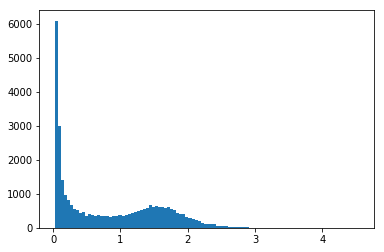

In [10]:
average_expression = np.average(SCMatrix,axis=1)
plt.hist(np.log10(average_expression+1),bins=100)
plt.show()
SCMatrix_preprocessed = SCMatrix[average_expression>10]

In [11]:
print(round(sys.getsizeof(SCMatrix_preprocessed)/10**9,3),'GB')

3.002 GB


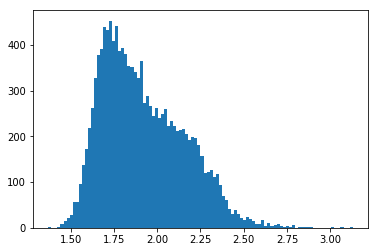

2.2879828365689794


In [26]:
# Low Varience Genes
rstd_expression = 100*np.std(SCMatrix_preprocessed,axis=1)/np.average(SCMatrix_preprocessed,axis=1)
plt.hist(np.log10(rstd_expression+1),bins=100)
plt.show()
print(np.log10(rstd_expression.sort_values(ascending=False)[1000]+1))
SCMatrix_preprocessed = SCMatrix_preprocessed.loc[rstd_expression.sort_values(ascending=False).index[0:5000]]

In [27]:
print(round(sys.getsizeof(SCMatrix_preprocessed)/10**9,3),'GB')

1.161 GB


In [53]:
SCMatrix_preprocessed.to_csv('/bigstore/binfo/mouse/Hippocampus/TBI.SHAM.countdata.with.celltypes.SCMatrix_preprocessed.csv')

In [ ]:
SCMatrix_preprocessed = pd.read_csv('/bigstore/binfo/mouse/Hippocampus/TBI.SHAM.countdata.with.celltypes.SCMatrix_preprocessed.csv.gz',index_col=_col=0)

In [55]:
print(round(sys.getsizeof(SCMatrix_preprocessed)/10**9,3),'GB')

1.161 GB


In [31]:
genes = list(SCMatrix_preprocessed.index)
cells = list(SCMatrix_preprocessed.columns)
matrix = SCMatrix_preprocessed.copy()
latent = np.array(latent)

In [54]:
nbits=18
ngenes = len(genes)
npos = 50
species = np.zeros((ngenes,nbits))
for i in range(nbits):
    x = random.sample(list(range(ngenes)),npos)
    species[x,i] = 1

In [64]:
species.shape

(5000, 18)

In [66]:
matrix.shape

(5000, 29013)

In [61]:
import time
start = time.time()
A = np.array(SCMatrix_preprocessed)
print(time.time()-start)

1.35243821144104


In [73]:
start = time.time()
temp_matrix = np.array(matrix)
compressed = pd.DataFrame(index = cells)
for i in range(species.shape[1]):
    compressed[i] = np.sum(np.multiply(temp_matrix,species[:,i][...,None]),axis=0)
print(time.time()-start)
compressed

33.30912375450134


0            1            2            3   \
S1Hip_CCTTGCCACACT_ODC     2070.659469  2510.757735  1298.615041  1467.021200   
S1Hip_TTCTATTCGTAG_ODC     1915.005657  2378.326544  1094.833943  1407.679397   
S1Hip_TTGGGCCCACCG_ODC     2002.349860  2198.333579  1505.035823  1639.542674   
S1Hip_ATGTACGCCGTG_ODC     2266.141173  2339.743888  1367.749491  1706.319472   
S1Hip_CCAGAATAATTT_ODC     2097.823038  2324.960321  1475.534385  1726.751261   
S1Hip_CCGCTCAAGTCC_ODC     2232.015130  2784.143055  1661.065606  1565.016537   
S1Hip_GGAGGATTGGGT_ODC     2143.382631  2509.992657  1356.158292  1649.992738   
S1Hip_AGTCACTGTTTA_ODC     2326.669542  2383.067906  1341.448063  1606.755802   
S1Hip_TAAAACCTATCG_ODC     2325.303563  2206.475903  1337.030414  1573.962532   
S1Hip_CCGTCCCGAGTT_ODC     1849.240355  2232.228872  1126.806765  1301.355339   
S1Hip_GCATAATAGGAC_ODC     2329.477641  2374.880679  1336.524948  1571.024662   
S1Hip_AAACGGCCAATC_ODC     2158.384919  2040.321220  1423.880873  1794.915137   
S1Hip_TATCTTTTGAGA_ODC     2313.745464  2146.632609  1166.956631  1452.216953   
S1Hip_AACATTAACCTG_ODC     2072.253207  2125.686546  2299.359317  3054.645199   
S1Hip_GTGCACTTAGGA_ODC     2435.678268  2599.460256  1420.563179  1529.239465   
S1Hip_ATCGTCTTACCT_ODC     2693.652199  2731.405897  1490.673224  1542.396773   
S1Hip_TAAGCCCCGCAC_ODC     1922.073540  1963.884524  2030.410311  2800.685219   
S1Hip_AGCCGTCTGCTT_ODC     2138.351453  2196.567280  1356.430425  1505.623304   
S1Hip_TGGCCGACTGGC_ODC     2278.399135  2361.319192  1392.177506  1566.782749   
S1Hip_CGCGAAATCAAA_ODC     2191.233694  2622.358918  1426.767730  1595.015464   
S1Hip_CAAGAAGACCGC_ODC     1957.609681  2367.873223  1463.593958  1581.909165   
S1Hip_CATGGTGGGCGA_ODC     2275.935470  2725.752219  1308.511306  1562.403299   
S1Hip_GGTAAATTCTAT_ODC     2608.358027  2532.618478  1364.488083  1690.371024   
S1Hip_CTTCAGCCGGTG_ODC     2769.044709  2467.597695  1681.942763  1639.596406   
S1Hip_CACGCTGATTGA_ODC     2413.358977  2404.670571  1463.912365  1464.024488   
S1Hip_TCTTTAATGAGG_ODC     2282.236170  2308.215943  1301.911188  1667.726793   
S1Hip_CAAGATGCTTAT_ODC     2595.408817  2693.496744  1564.708889  1947.055230   
S1Hip_CAGTCGCCGCCC_ODC     2058.768510  1997.703322  1870.732284  2721.158141   
S1Hip_TGACCGACCAGG_ODC     2422.822792  2802.805064  1582.134433  1610.368161   
S1Hip_CCTCCAGTTAGC_ODC     2058.705531  2323.317421  1670.522858  1994.842256   
...                                ...          ...          ...          ...   
TBI3Hip_TACCTATGAAGG_EPEN  2272.356065  3711.098319  4639.431410  3327.890760   
TBI3Hip_ATCGACCTTTCA_EPEN  2702.134913  3522.549341  4633.948718  3537.315502   
TBI3Hip_AACTGTCTAAAC_EPEN  2503.636830  3489.639351  4028.208914  3126.878796   
TBI3Hip_AAGAAATCTCAG_EPEN  2418.227592  3460.340377  4476.311579  3410.311384   
TBI3Hip_AACAGCCTGTGT_EPEN  2180.602787  3432.872673  3849.439704  2792.576032   
TBI3Hip_ATGCACCTACTT_EPEN  2282.117156  3467.203701  4313.384326  3171.715870   
TBI3Hip_ACACGGTTCAGC_EPEN  2065.342657  3762.583582  4227.559923  2630.498542   
TBI3Hip_CCGATTGGGGCG_EPEN  2143.373768  3523.109456  4009.229384  2745.297401   
TBI3Hip_TGAGCGGGGACG_EPEN  2553.046953  3344.135716  3722.332420  2720.536036   
TBI3Hip_AAGCTTATAAAA_EPEN  2669.432447  3536.801352  4671.767950  2604.481453   
TBI3Hip_CCTGCTAAGTGC_EPEN  2347.192660  3311.904686  4101.700259  3236.728596   
TBI3Hip_ACGACTGAGAAG_EPEN  2228.408118  3198.264322  3851.170794  3403.690068   
TBI3Hip_CAAGTTTTACTA_EPEN  2533.278401  3072.156811  4320.086494  2547.263366   
TBI3Hip_GTGTCATTTAAG_EPEN  2357.620824  3515.845251  4480.041221  2643.620471   
TBI3Hip_CCTATGAGGCCT_EPEN  2009.907018  3374.099781  3715.500501  2884.823222   
TBI3Hip_GCTTGGCATAGC_EPEN  2174.727813  3153.673152  4072.604097  2373.466044   
TBI3Hip_ATACCTAGCGCG_EPEN  2247.611528  3632.600582  4107.427072  2543.505840   
TBI3Hip_CTAAGCTGCAGC_EPEN  2625.237250  2906.764477  3634.294768  2

In [76]:
ncells = len(cells)
start = time.time()
temp_matrix = np.array(matrix)
compressed = np.empty((ncells,nbits))
for i in range(species.shape[1]):
    compressed[:,i] = np.sum(np.multiply(temp_matrix,species[:,i][...,None]),axis=0)
compressed = pd.DataFrame(compressed,index=cells)
print(time.time()-start)
compressed

36.12697887420654


0            1            2            3   \
S1Hip_CCTTGCCACACT_ODC     2070.659469  2510.757735  1298.615041  1467.021200   
S1Hip_TTCTATTCGTAG_ODC     1915.005657  2378.326544  1094.833943  1407.679397   
S1Hip_TTGGGCCCACCG_ODC     2002.349860  2198.333579  1505.035823  1639.542674   
S1Hip_ATGTACGCCGTG_ODC     2266.141173  2339.743888  1367.749491  1706.319472   
S1Hip_CCAGAATAATTT_ODC     2097.823038  2324.960321  1475.534385  1726.751261   
S1Hip_CCGCTCAAGTCC_ODC     2232.015130  2784.143055  1661.065606  1565.016537   
S1Hip_GGAGGATTGGGT_ODC     2143.382631  2509.992657  1356.158292  1649.992738   
S1Hip_AGTCACTGTTTA_ODC     2326.669542  2383.067906  1341.448063  1606.755802   
S1Hip_TAAAACCTATCG_ODC     2325.303563  2206.475903  1337.030414  1573.962532   
S1Hip_CCGTCCCGAGTT_ODC     1849.240355  2232.228872  1126.806765  1301.355339   
S1Hip_GCATAATAGGAC_ODC     2329.477641  2374.880679  1336.524948  1571.024662   
S1Hip_AAACGGCCAATC_ODC     2158.384919  2040.321220  1423.880873  1794.915137   
S1Hip_TATCTTTTGAGA_ODC     2313.745464  2146.632609  1166.956631  1452.216953   
S1Hip_AACATTAACCTG_ODC     2072.253207  2125.686546  2299.359317  3054.645199   
S1Hip_GTGCACTTAGGA_ODC     2435.678268  2599.460256  1420.563179  1529.239465   
S1Hip_ATCGTCTTACCT_ODC     2693.652199  2731.405897  1490.673224  1542.396773   
S1Hip_TAAGCCCCGCAC_ODC     1922.073540  1963.884524  2030.410311  2800.685219   
S1Hip_AGCCGTCTGCTT_ODC     2138.351453  2196.567280  1356.430425  1505.623304   
S1Hip_TGGCCGACTGGC_ODC     2278.399135  2361.319192  1392.177506  1566.782749   
S1Hip_CGCGAAATCAAA_ODC     2191.233694  2622.358918  1426.767730  1595.015464   
S1Hip_CAAGAAGACCGC_ODC     1957.609681  2367.873223  1463.593958  1581.909165   
S1Hip_CATGGTGGGCGA_ODC     2275.935470  2725.752219  1308.511306  1562.403299   
S1Hip_GGTAAATTCTAT_ODC     2608.358027  2532.618478  1364.488083  1690.371024   
S1Hip_CTTCAGCCGGTG_ODC     2769.044709  2467.597695  1681.942763  1639.596406   
S1Hip_CACGCTGATTGA_ODC     2413.358977  2404.670571  1463.912365  1464.024488   
S1Hip_TCTTTAATGAGG_ODC     2282.236170  2308.215943  1301.911188  1667.726793   
S1Hip_CAAGATGCTTAT_ODC     2595.408817  2693.496744  1564.708889  1947.055230   
S1Hip_CAGTCGCCGCCC_ODC     2058.768510  1997.703322  1870.732284  2721.158141   
S1Hip_TGACCGACCAGG_ODC     2422.822792  2802.805064  1582.134433  1610.368161   
S1Hip_CCTCCAGTTAGC_ODC     2058.705531  2323.317421  1670.522858  1994.842256   
...                                ...          ...          ...          ...   
TBI3Hip_TACCTATGAAGG_EPEN  2272.356065  3711.098319  4639.431410  3327.890760   
TBI3Hip_ATCGACCTTTCA_EPEN  2702.134913  3522.549341  4633.948718  3537.315502   
TBI3Hip_AACTGTCTAAAC_EPEN  2503.636830  3489.639351  4028.208914  3126.878796   
TBI3Hip_AAGAAATCTCAG_EPEN  2418.227592  3460.340377  4476.311579  3410.311384   
TBI3Hip_AACAGCCTGTGT_EPEN  2180.602787  3432.872673  3849.439704  2792.576032   
TBI3Hip_ATGCACCTACTT_EPEN  2282.117156  3467.203701  4313.384326  3171.715870   
TBI3Hip_ACACGGTTCAGC_EPEN  2065.342657  3762.583582  4227.559923  2630.498542   
TBI3Hip_CCGATTGGGGCG_EPEN  2143.373768  3523.109456  4009.229384  2745.297401   
TBI3Hip_TGAGCGGGGACG_EPEN  2553.046953  3344.135716  3722.332420  2720.536036   
TBI3Hip_AAGCTTATAAAA_EPEN  2669.432447  3536.801352  4671.767950  2604.481453   
TBI3Hip_CCTGCTAAGTGC_EPEN  2347.192660  3311.904686  4101.700259  3236.728596   
TBI3Hip_ACGACTGAGAAG_EPEN  2228.408118  3198.264322  3851.170794  3403.690068   
TBI3Hip_CAAGTTTTACTA_EPEN  2533.278401  3072.156811  4320.086494  2547.263366   
TBI3Hip_GTGTCATTTAAG_EPEN  2357.620824  3515.845251  4480.041221  2643.620471   
TBI3Hip_CCTATGAGGCCT_EPEN  2009.907018  3374.099781  3715.500501  2884.823222   
TBI3Hip_GCTTGGCATAGC_EPEN  2174.727813  3153.673152  4072.604097  2373.466044   
TBI3Hip_ATACCTAGCGCG_EPEN  2247.611528  3632.600582  4107.427072  2543.505840   
TBI3Hip_CTAAGCTGCAGC_EPEN  2625.237250  2906.764477  3634.294768  2

In [ ]:
def calculate_metric(self,compressed):
        X = compressed.copy()
        matrix_df = pd.DataFrame(self.matrix,index=self.genes,columns=self.cells)
        cells = np.array(self.cells)
        n = random.sample(list(range(self.ncells)),int(self.sample*self.ncells))
        dist = euclidean_distances(X, X[n,:])
        rank = dist.argpartition(self.k+1,axis=0)[:self.k+1,:]
        metrics = []
        correlations = []
        for i,idx in enumerate(n):
            cell = cells[idx]
            knn = cells[rank[:,i]]
            knn = knn[knn!=cell]
            sig = matrix_df[cell]
            avg = np.average(matrix_df[knn[1:]],axis=1)
            metric = np.divide(np.sqrt(np.sum(np.square(np.subtract(sig,avg)))),self.nbits)
            correlation = spearmanr(sig,avg)[0]
            metrics.append(metric)
            correlations.append(correlation)
        metric = np.average(metrics)
        correlation = np.average(correlations)
        del matrix_df
        return metric,correlation

In [79]:
start = time.time()
sample = 0.1
k = 20
X = np.array(compressed.copy())
cells = np.array(cells)
n = random.sample(list(range(ncells)),int(sample*ncells))
dist = euclidean_distances(X, X[n,:])
rank = dist.argpartition(k+1,axis=0)[:k+1,:]
metrics = []
correlations = []
for i,idx in enumerate(n):
    cell = cells[idx]
    knn = cells[rank[:,i]]
    knn = knn[knn!=cell]
    sig = matrix[cell]
    avg = np.average(matrix[knn[1:]],axis=1)
    metric = np.divide(np.sqrt(np.sum(np.square(np.subtract(sig,avg)))),nbits)
    correlation = spearmanr(sig,avg)[0]
    metrics.append(metric)
    correlations.append(correlation)
metric = np.average(metrics)
correlation = np.average(correlations)
print(time.time()-start)

18.358310222625732


In [98]:
# Zscore 
gene_variance = np.std(matrix,axis=1)
np.sum(np.abs((sig-avg)/gene_variance))

S100a8           0.000190
S100a9           0.002169
Cd74            -0.001312
Igfbpl1         -0.036117
Ccdc153         -0.011285
Mki67            0.013381
Nhlh2           -0.054020
Tagln           -0.014181
1500016L03Rik   -0.018968
Cnn1            -0.014856
Myh11           -0.010150
Neurod1         -0.019255
Tpm2            -0.010552
Gpihbp1          0.000234
Lhx1            -0.031992
Gal              0.070627
Lyve1            0.006511
Top2a           -0.003154
Acta2           -0.003124
Myl9            -0.004125
Tmem212         -0.038036
Ube2c           -0.002544
Tmem117         -0.013340
Atp13a5          0.002697
Ccr2             0.000044
Map3k7cl        -0.018527
Hmmr             0.010174
Fam159b          0.073065
Zscan20         -0.021281
Pla1a           -0.003483
                   ...   
Atat1           -0.076528
Rasal2           0.168158
Tbc1d8          -0.127170
Rab40c           0.099584
Klhdc8b          0.135439
Tmcc2           -0.268803
Ptar1            0.059203
Map1a       

In [99]:
np.sum(np.abs((sig-avg)/gene_variance))

720.1375102841929

In [86]:
knn

array(['S2Hip_GTTATAACTTTG_NEU', 'Sham4Hip_AGTGCCCTAAAC_NEU',
       'Sham4Hip_TGCTCTAGTTGG_NEU', 'Sham4Hip_AGTACGATGGCA_NEU',
       'Sham4Hip_CAGCTGCTAGTG_NEU', 'Sham6Hip_TCCTGACGCTCG_NEU',
       'TBI5Hip_CCTCCCGGGTCC_NEU', 'Sham4Hip_ATCCGAGCGGCC_NEU',
       'S2Hip_CTCATCCATTGA_NEU', 'Sham4Hip_CGCTTATCAACA_NEU',
       'Sham4Hip_TGTTTCTAAAGT_NEU', 'S2Hip_GCTCGGCGGCAT_NEU',
       'Sham4Hip_CAAGCAATGACG_NEU', 'S2Hip_CTCATCCATTGT_NEU',
       'Sham4Hip_CTAATCCCAGTT_NEU', 'Sham4Hip_TTATCGTCCATT_NEU',
       'S2Hip_CTCATCCATTCC_NEU', 'Sham4Hip_CAGGCAATTGGC_NEU',
       'S2Hip_GCTCGGCGGCAG_NEU', 'TBI5Hip_GGCTTCTCAATC_NEU'], dtype='<U29')

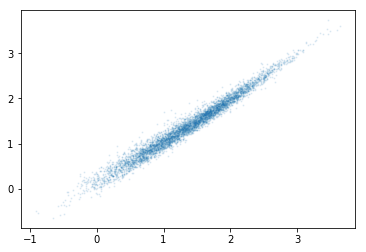

0.9839348007806207
0.1440275020568386


In [102]:
plt.scatter(np.log10(sig),np.log10(avg),s=1,alpha=0.1)
plt.show()
print(spearmanr(sig,avg)[0])
gene_variance = np.std(matrix,axis=1)
print(np.average(np.abs((sig-avg)/gene_variance)))

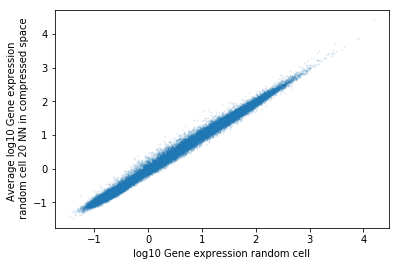

0.9944170158083395


0.28285296657241665

In [103]:
tsig = SCMatrix[cell]
tavg = np.average(SCMatrix[knn[1:]],axis=1)
plt.scatter(np.log10(tsig),np.log10(tavg),s=1,alpha=0.1)
plt.xlabel('log10 Gene expression random cell')
plt.ylabel('Average log10 Gene expression \n random cell 20 NN in compressed space')
plt.show()
print(spearmanr(tsig,tavg)[0])
tgene_variance = np.std(SCMatrix,axis=1)
np.average(np.abs((tsig-tavg)/tgene_variance))

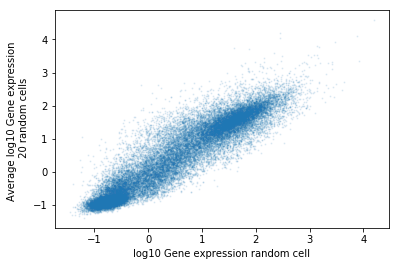

0.9286624533239337


0.8346982479564576

In [105]:
tsig = SCMatrix[cell]

tavg = np.average(SCMatrix[random.sample(list(SCMatrix.columns),20)],axis=1)
plt.scatter(np.log10(tsig),np.log10(tavg),s=1,alpha=0.1)
plt.xlabel('log10 Gene expression random cell')
plt.ylabel('Average log10 Gene expression \n 20 random cells')
plt.show()
print(spearmanr(tsig,tavg)[0])
np.average(np.abs((tsig-tavg)/tgene_variance))

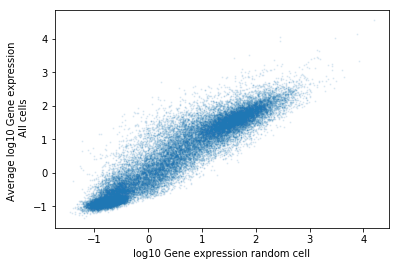

0.9368755284371962


0.7681311549539415

In [106]:
tsig = SCMatrix[cell]

tavg = np.average(SCMatrix,axis=1)
plt.scatter(np.log10(tsig),np.log10(tavg),s=1,alpha=0.1)
plt.xlabel('log10 Gene expression random cell')
plt.ylabel('Average log10 Gene expression \n All cells')
plt.show()
print(spearmanr(tsig,tavg)[0])
np.average(np.abs((tsig-tavg)/tgene_variance))

In [120]:
SCMatrix.shape

(32355, 29013)

In [123]:
['blank'+str(i)for i in range(nblanks)]

['blank0',
 'blank1',
 'blank2',
 'blank3',
 'blank4',
 'blank5',
 'blank6',
 'blank7',
 'blank8',
 'blank9',
 'blank10',
 'blank11',
 'blank12',
 'blank13',
 'blank14',
 'blank15',
 'blank16',
 'blank17',
 'blank18',
 'blank19',
 'blank20',
 'blank21',
 'blank22',
 'blank23',
 'blank24',
 'blank25',
 'blank26',
 'blank27',
 'blank28',
 'blank29',
 'blank30',
 'blank31',
 'blank32',
 'blank33',
 'blank34',
 'blank35',
 'blank36',
 'blank37',
 'blank38',
 'blank39',
 'blank40',
 'blank41',
 'blank42',
 'blank43',
 'blank44',
 'blank45',
 'blank46',
 'blank47',
 'blank48',
 'blank49']

In [127]:
nblanks = 50
blanks = pd.DataFrame(np.zeros((nblanks,len(cells))),index=['blank'+str(i)for i in range(nblanks)],columns=list(SCMatrix.columns))

In [130]:
pd.concat([SCMatrix,blanks])

S1Hip_CCTTGCCACACT_ODC  S1Hip_TTCTATTCGTAG_ODC  \
Reps1                   44.327400               36.272220   
Soga3                  123.398349              109.782974   
Rps15                  618.085382              528.949604   
Anks1b                 459.308503              522.124406   
Eea1                   112.507296               80.928352   
Rpl41                  383.732578              350.840768   
Ccdc85a                  6.986219                3.838045   
Cyfip2                  37.403013               31.946805   
Gria1                   45.136869               26.312106   
Dnah2                    4.954114                3.604976   
Eif5a                  188.999329              166.037265   
Pfn1                   445.194222              482.254021   
Myo1d                   55.628345               52.963860   
Bzrap1                   7.268712                3.197081   
Msi2                    72.438510               67.473935   
Kansl1                  32.923581               31.096039   
Mapt                   970.905880             1457.875711   
Kidins220               59.330650               61.271538   
Dock4                   32.496657               53.431388   
Mnat1                   48.719798               42.742071   
Gphn                   104.717925              109.268127   
Meg3                   191.476487               98.468197   
Mirg                     4.175432                1.248347   
Zmynd11                194.474065              189.523416   
Adcy2                   16.795759                9.291546   
BC018507                13.000918               15.322707   
Ttc37                   10.507571               11.577817   
Gm4076                 158.522409              115.087503   
Map1b                  123.760750              108.445201   
Mccc2                   25.007714               32.977445   
...                           ...                     ...   
blank20                  0.000000                0.000000   
blank21                  0.000000                0.000000   
blank22                  0.000000                0.000000   
blank23                  0.000000                0.000000   
blank24                  0.000000                0.000000   
blank25                  0.000000                0.000000   
blank26                  0.000000                0.000000   
blank27                  0.000000                0.000000   
blank28                  0.000000                0.000000   
blank29                  0.000000                0.000000   
blank30                  0.000000                0.000000   
blank31                  0.000000                0.000000   
blank32                  0.000000                0.000000   
blank33                  0.000000                0.000000   
blank34                  0.000000                0.000000   
blank35                  0.000000                0.000000   
blank36                  0.000000                0.000000   
blank37                  0.000000                0.000000   
blank38                  0.000000                0.000000   
blank39                  0.000000                0.000000   
blank40                  0.000000                0.000000   
blank41                  0.000000                0.000000   
blank42                  0.000000                0.000000   
blank43                  0.000000                0.000000   
blank44                  0.000000                0.000000   
blank45                  0.000000                0.000000   
blank46                  0.000000                0.000000   
blank47                  0.000000                0.000000   
blank48                  0.000000                0.000000   
blank49                  0.000000                0.000000   

           S1Hip_TTGGGCCCACCG_ODC  S1Hip_ATGTACGCCGTG_ODC  \
Reps1                   32.044081               49.884129   
Soga3                  136.354924              148.335690   
Rps15                  571.626879            

In [6]:
matrix = pd.read_csv('/bigstore/binfo/mouse/Hippocampus/TBI.SHAM.countdata.with.celltypes.SCMatrix_preprocessed.csv.gz',index_col=0)
matrix.head()

S1Hip_CCTTGCCACACT_ODC  S1Hip_TTCTATTCGTAG_ODC  \
S100a8                 2.364784                1.461975   
S100a9                 7.980294                5.745429   
Cd74                  10.741047                9.227930   
Igfbpl1                2.559000                3.063422   
Ccdc153                4.402882                0.920499   

         S1Hip_TTGGGCCCACCG_ODC  S1Hip_ATGTACGCCGTG_ODC  \
S100a8                 5.391096                2.509546   
S100a9                21.338277                9.668505   
Cd74                  13.273919                9.146592   
Igfbpl1                6.540781                3.762574   
Ccdc153                4.617224                3.669908   

         S1Hip_CCAGAATAATTT_ODC  S1Hip_CCGCTCAAGTCC_ODC  \
S100a8                 4.712524                3.768372   
S100a9                16.653468                8.456556   
Cd74                  12.799319               11.450016   
Igfbpl1                6.495443                8.464190   
Ccdc153                2.764918                6.075985   

         S1Hip_GGAGGATTGGGT_ODC  S1Hip_AGTCACTGTTTA_ODC  \
S100a8                 3.398080                1.985958   
S100a9                11.952849                6.803702   
Cd74                  14.036164                7.856625   
Igfbpl1                3.924460                4.838439   
Ccdc153                3.444847                5.254631   

         S1Hip_TAAAACCTATCG_ODC  S1Hip_CCGTCCCGAGTT_ODC  \
S100a8                 1.851293                1.444066   
S100a9                 8.912395                5.577855   
Cd74                   6.947047                5.647035   
Igfbpl1                5.354334                4.269884   
Ccdc153                5.509724                3.005932   

                   ...              TBI5Hip_TCCTGAGACGCT_EPEN  \
S100a8             ...                              39.517119   
S100a9             ...                              12.737410   
Cd74               ...                               0.538771   
Igfbpl1            ...                              21.730695   
Ccdc153            ...                             686.168438   

         TBI5Hip_TTGCGCAAAACG_EPEN  TBI5Hip_ACGCCGAGTTGC_EPEN  \
S100a8                   15.271486                  37.562048   
S100a9                   13.524374                  28.377019   
Cd74                      0.328390                   0.334835   
Igfbpl1                  18.055809                  12.546088   
Ccdc153                 811.829465                1850.815723   

         TBI5Hip_CAGCATATGGCG_EPEN  TBI5Hip_GACATCATTCAT_EPEN  \
S100a8                   12.583853                  13.415616   
S100a9                   11.633263                   7.572255   
Cd74                      0.144499                   1.152239   
Igfbpl1                  10.939027                  24.903960   
Ccdc153                1970.840851                 412.212219   

         TBI5Hip_GGTATTGACACC_EPEN  TBI5Hip_TCCCACGCCAAC_EPEN  \
S100a8                   11.784147                  27.445561   
S100a9                    7.296736                  20.328600   
Cd74                      1.003730                   0.360613   
Igfbpl1                  13.431865                  14.821945   
Ccdc153                 219.295325                1919.269795   

         TBI5Hip_TTCCTGTAGACC_EPEN  TBI5Hip_ATTTAATTGAGC_EPEN  \
S100a8                   20.220385                  14.600374   
S100a9                   16.262575                   9.789528   
Cd74                      0.305442                   0.468544   
Igfbpl1                  17.965363                  24.990080   
Ccdc153                1976.343105                1140.786102   

         TBI5Hip_ATCCCTCGCAGC_EPEN  
S100a8                   53.748689  
S100a9                   39.593735  
Cd74                      0.747466  
Igfbpl1                  17.317838  
Ccdc153                 620.182953  

[5 rows x 29013 columns]

In [7]:
latent = pd.read_csv('/bigstore/binfo/mouse/Hippocampus/TBI.SHAM.countdata.with.celltypes.latent.csv.gz',index_col=0)
latent = latent.astype('float32')
latent.head()

0         1         2         3         4  \
S1Hip_CCTTGCCACACT_ODC  0.392325 -0.771534 -1.173959  1.528997  0.412008   
S1Hip_TTCTATTCGTAG_ODC  0.250088 -1.054843 -1.740179  1.171318  0.322338   
S1Hip_TTGGGCCCACCG_ODC -0.085551 -0.430284 -0.918166  1.508396  0.936266   
S1Hip_ATGTACGCCGTG_ODC  0.617349 -0.243066 -1.808540  1.689078  0.312485   
S1Hip_CCAGAATAATTT_ODC  0.390005 -0.831750 -0.980679  1.453218  1.143527   

                               5         6         7         8         9  
S1Hip_CCTTGCCACACT_ODC -0.678457 -0.110804  1.066432  1.334158 -0.022135  
S1Hip_TTCTATTCGTAG_ODC -1.180409  0.454631  0.070974  1.275095 -0.147270  
S1Hip_TTGGGCCCACCG_ODC -0.716988  0.468579  0.686355  1.113158 -0.313047  
S1Hip_ATGTACGCCGTG_ODC -0.664520  0.216020  0.383360  0.573401  0.371106  
S1Hip_CCAGAATAATTT_ODC -0.850921  0.269316  0.324075  0.899953  0.021807

In [9]:
info_df = pd.read_csv('/bigstore/binfo/mouse/Hippocampus/TBI.SHAM.countdata.with.celltypes.info_df.csv',index_col=0)
info_df.head()

region dataset       barcode cell_type treatment
S1Hip_CCTTGCCACACT_ODC    Hip      S1  CCTTGCCACACT       ODC      SHAM
S1Hip_TTCTATTCGTAG_ODC    Hip      S1  TTCTATTCGTAG       ODC      SHAM
S1Hip_TTGGGCCCACCG_ODC    Hip      S1  TTGGGCCCACCG       ODC      SHAM
S1Hip_ATGTACGCCGTG_ODC    Hip      S1  ATGTACGCCGTG       ODC      SHAM
S1Hip_CCAGAATAATTT_ODC    Hip      S1  CCAGAATAATTT       ODC      SHAM

In [14]:
info_df.loc[random.sample(list(info_df.index),1)].cell_type


S2Hip_CCCGTCCTCGAA_END    END
Name: cell_type, dtype: object

In [17]:
cell = info_df.loc[random.sample(list(info_df.index),1)].cell_type.iloc[0]
temp_df = info_df.loc[random.sample(list(info_df.index),20)]
len(temp_df[temp_df.cell_type==cell])/20

0.15

In [13]:
info_df.cell_type.unique()

array(['ODC', 'ASC', 'NEU', 'aMG', 'END', 'MG', 'OPC', 'CPE', 'PER',
       'SMC', 'nODC', 'CR', 'NeuroG1', 'MAC', 'FB', 'NeuroG2', 'EPEN'],
      dtype=object)

In [ ]:
temp = info_df.loc[random.sample(list(info_df.index),20)]

for c in info_df.cell_type.unique():
    

In [ ]:
# Add train and test aspect

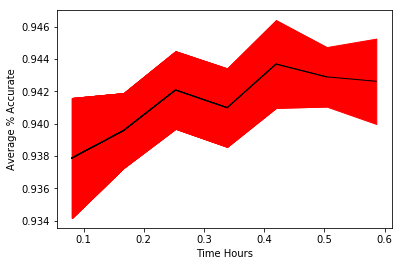

Iteration 7


In [ ]:
class CompressedSensingClass(object):
    def __init__(self,matrix,latent,info_df,
                 metric='cell_type',
                 nblanks=None,
                 npos=50,
                 nbits=18,
                 ncpu=1,
                 pop_ncpu=1,
                 keepers=10,
                 mutation_rate=0.1,
                 offspring_number=0,
                 mutation_number=0,
                 k=100,
                 sample=1000,
                 survivors=[],
                 iterations=100,
                 base_path='',
                 color='r',
                 fresh=True,
                 verbose=True):
        self.metric = metric
        self.info_df = info_df
        self.cell_types = self.info_df.cell_type.unique()
        self.fresh = fresh
        self.verbose = verbose
        if base_path == '':
            base_path = os.path.join(os.getcwd(),'Results')
        self.base_path = base_path
        if not os.path.exists(self.base_path):
            os.mkdir(self.base_path)
        else:
            print('Found Existing Path\n',self.base_path)
            if self.fresh:
                print('base_path already exists and will be overwritten')
                shutil.rmtree(self.base_path)
                os.mkdir(self.base_path)
            else:
                print('loading dict from file isnt supported yet')
        self.cells = list(matrix.columns)
        self.ncells = len(self.cells)
        if nblanks==None:
            nblanks = npos
        blanks = pd.DataFrame(np.zeros((nblanks,self.ncells)),index=['blank'+str(i)for i in range(nblanks)],columns=self.cells)
        self.matrix = pd.concat([matrix,blanks])
        self.gene_variance = np.std(self.matrix ,axis=1)
        self.nblanks = nblanks
        del matrix
        self.genes = list(self.matrix.index)
        self.ngenes = len(self.genes)
        self.npos = npos
        self.nbits = nbits
        self.ncpu = ncpu
        self.pop_ncpu = pop_ncpu
        self.keepers = keepers
        self.ideal = np.zeros(self.ngenes)
        self.ideal[0:npos] = 1
        self.ideal = list(self.ideal)
        self.mutation_rate = mutation_rate
        self.offspring_number = offspring_number
        self.mutation_number = mutation_number
        self.k = k # could infer
        self.sample = sample
        self.survivors = survivors
        self.iterations = iterations
        self.color = color

    def generate_random(self):
        species = np.zeros((self.ngenes,self.nbits))
        for i in range(self.nbits):
            x = random.sample(list(range(self.ngenes)),self.npos)
            species[x,i] = 1
        return species

    def generate_starting_survivors(self):
        survivors = []
        for k in range(self.keepers):
            survivors.append(self.generate_random())
        self.survivors = survivors

    def generate_mutations(self,species):
        mutated = species.copy()
        for y in range(self.nbits):
            for x in random.sample(list(range(self.ngenes)),int(self.mutation_rate*self.ngenes)):
                mutated[x,y] = random.sample(self.ideal,1)[0]
        return mutated

    def generate_offspring(self,species,mate):
        offspring = species.copy()
        for y in range(self.nbits):
            for x in random.sample(list(range(self.ngenes)),int(self.ngenes/2)):
                offspring[x,y] = mate[x,y]
        return offspring

    def generate_progenerators(self):
        progenerators = self.survivors.copy()
        for species in self.survivors:
            for i in range(self.offspring_number):
                mate = self.survivors[random.randint(0,self.keepers-1)].copy()
                progenerators.append(self.generate_offspring(species,mate))
        self.progenerators = progenerators

    def pfunc_generate_mutations(self,species):
        ppopulation = []
        for i in range(self.mutation_number):
            ppopulation.append(self.generate_mutations(species))
        return ppopulation

    def generate_population(self):
        population = self.progenerators.copy()
        if self.mutation_number>0:
            if self.pop_ncpu==1:
                for species in self.progenerators:
                    for i in range(self.mutation_number):
                        population.append(self.generate_mutations(species))
            else:
                sys.stdout.flush()
                with Pool(self.pop_ncpu) as p:
                    for ppopulation in p.imap(self.pfunc_generate_mutations,self.progenerators,chunksize=1):
                        for species in ppopulation:
                            population.append(species)
                sys.stdout.flush()
        self.population = population

    def generate_compressed(self,species):
        compressed = pd.DataFrame(index=self.cells)
        temp_matrix = np.array(self.matrix)
        out = []
        for i in range(self.nbits):
            compressed[i] = np.sum(np.multiply(temp_matrix,species[:,i][...,None]),axis=0)
        return compressed

    def calculate_metric(self,compressed):
        X = np.array(compressed.copy())
        cells = np.array(self.cells)
        n = random.sample(list(range(self.ncells)),int(self.sample*self.ncells))
        dist = euclidean_distances(X, X[n,:])
        rank = dist.argpartition(self.k+1,axis=0)[:self.k+1,:]
        metrics = []
        correlations = []
        for i,idx in enumerate(n):
            cell = cells[idx]
            knn = cells[rank[:,i]]
            knn = knn[knn!=cell]
            sig = self.matrix[cell]
            avg = np.average(self.matrix[knn[1:]],axis=1)
            correlation = spearmanr(sig,avg)[0]
            if self.metric =='imputation':
                metric = np.nanmean(np.abs((sig-avg)/self.gene_variance))
            elif self.metric == 'cell_type':
                cell = self.info_df.loc[knn[0]].cell_type
                temp_df = self.info_df.loc[knn[1:]]
                metric = len(temp_df[temp_df.cell_type==cell])/self.k
            elif self.metric == 'dendogram':
                print('Not implemented')
#             metric = np.divide(np.sqrt(np.sum(np.square(np.subtract(sig,avg)))),self.nbits)
            correlation = spearmanr(sig,avg)[0]
            metrics.append(metric)
            correlations.append(correlation)
        metric = np.average(metrics)
        correlation = np.average(correlations)
        return metric,correlation

    def pfunc(self,species):
        compressed = self.generate_compressed(species)
        metric,correlation = self.calculate_metric(compressed)
        return species,compressed,metric,correlation
    
    def selection(self):
        new_population = []
        compresseds = []
        metrics = []
        correlations = []
        if self.ncpu==1:
            for species in tqdm.tqdm(self.population):
                species,compressed,metric,correlation = self.pfunc(species)
                new_population.append(species)
                compresseds.append(compressed)
                metrics.append(metric)
                correlations.append(correlation)
        else:
            sys.stdout.flush()
            with Pool(self.ncpu) as p:
                for species,compressed,metric,correlation in tqdm.tqdm(p.imap(self.pfunc,self.population,chunksize=1),total=len(self.population)):
                    new_population.append(species)
                    compresseds.append(compressed)
                    metrics.append(metric)
                    correlations.append(correlation)
            sys.stdout.flush()
        df = pd.DataFrame(index=range(len(self.population)))
        df['population'] = new_population
        df['metrics'] = metrics
        df['compresseds'] = compresseds
        df['correlations'] = correlations
        df = df.sort_values('metrics',ascending=False)
        survivors = df.iloc[:self.keepers]
        self.metrics = list(survivors['metrics'])
        self.compresseds = list(survivors['compresseds'])
        self.correlations = list(survivors['correlations'])
        self.survivors = list(survivors['population'])
        self.elite_survivor = self.survivors[0]
    
    def populate(self):
        self.generate_progenerators()
        self.generate_population()
            
    def evolve(self):
        start_time = time.time()
        self.X = []
        self.Y = []
        self.max = []
        self.min = []
        if len(self.survivors) != self.keepers:
            self.generate_starting_survivors()
        display.clear_output(wait=True)
        for I in range(self.iterations):
            if self.verbose:
                print('Iteration '+str(I))
            self.populate()
            self.selection()
            pickle.dump(self.elite_survivor,open(os.path.join(self.base_path,str('elite_survivor_'+str(I)+'.pkl')),'wb'))
            pickle.dump(self.survivors,open(os.path.join(self.base_path,str('survivors_'+str(I)+'.pkl')),'wb'))
            pickle.dump(self.metrics,open(os.path.join(self.base_path,str('metrics_'+str(I)+'.pkl')),'wb'))
            pickle.dump(self.compresseds,open(os.path.join(self.base_path,str('compresseds_'+str(I)+'.pkl')),'wb'))
            pickle.dump(self.correlations,open(os.path.join(self.base_path,str('correlations_'+str(I)+'.pkl')),'wb'))
            avg = np.average(self.metrics)
            std = np.std(self.metrics) 
            self.X.append((time.time()-start_time)/(60*60))
            self.Y.append(avg)
            self.max.append(avg+std)
            self.min.append(avg-std)
            if self.verbose:
#                 pl.plot(self.X,np.log10(self.Y),c='k',linewidth=1)
#                 pl.fill_between(self.X,np.log10(self.max),np.log10(self.min),color=self.color)
                pl.plot(self.X,self.Y,c='k',linewidth=1)
                pl.fill_between(self.X,self.max,self.min,color=self.color)
                if self.metric =='imputation':
                    pl.ylabel('Average Zscore')
                elif self.metric == 'cell_type':
                    pl.ylabel('Average % Accurate')
                elif self.metric == 'dendogram':
                    pl.ylabel('Average metric')
                pl.xlabel('Time Hours')
                display.clear_output(wait=True)
                display.display(pl.gcf())
            if I>10:
                if np.average(self.Y[-5:])==self.Y[-1]:
                    break
        if self.verbose:
            display.clear_output(wait=True)
            print('Average Correlation:',round(np.average(self.correlations),4))
            print('Standard Deviation:',round(np.std(self.correlations),4))

CSC = CompressedSensingClass(matrix,latent,info_df,
                             npos=50,
                             nbits=18,
                             ncpu=30,
                             pop_ncpu=30,
                             keepers=10,
                             mutation_rate=0.3,
                             offspring_number=0,
                             mutation_number=2,
                             k=50,
                             sample=0.05,
                             survivors=[],
                             iterations=100,
                             base_path='/bigstore/GeneralStorage/Zach/CSI',
                             color='r',
                             fresh=True,
                             verbose=True)
CSC.evolve()

In [22]:
CSC.info_df.loc[CSC.cells[0]].cell_type

'ODC'

In [ ]:
a=

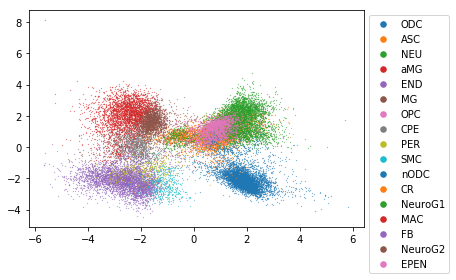

In [144]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
compressed = CSC.compresseds[0].copy()
pca = PCA(n_components=2)
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

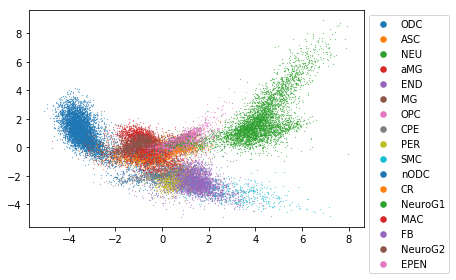

In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
compressed = pickle.load(open('/bigstore/GeneralStorage/Zach/CSI/compresseds_0.pkl','rb'))[0]
pca = PCA(n_components=2)
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

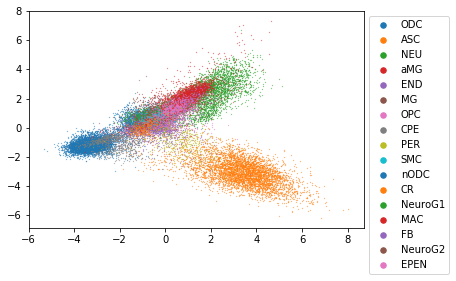

In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
compressed = pickle.load(open('/bigstore/GeneralStorage/Zach/CSI/compresseds_10.pkl','rb'))[0]
pca = PCA(n_components=2)
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

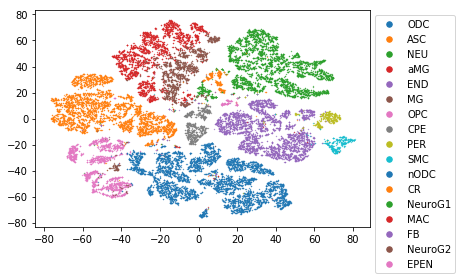

In [152]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
compressed = pickle.load(open('/bigstore/GeneralStorage/Zach/CSI/compresseds_0.pkl','rb'))[0]
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = TSNE(n_components=2).fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=CSC.cells)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.1,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

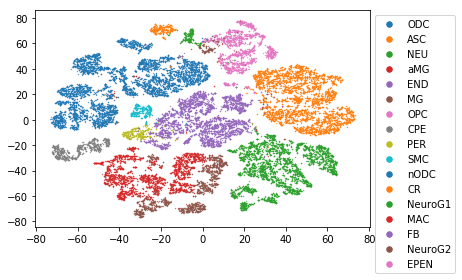

In [153]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
compressed = pickle.load(open('/bigstore/GeneralStorage/Zach/CSI/compresseds_10.pkl','rb'))[0]
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = TSNE(n_components=2).fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=CSC.cells)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.1,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

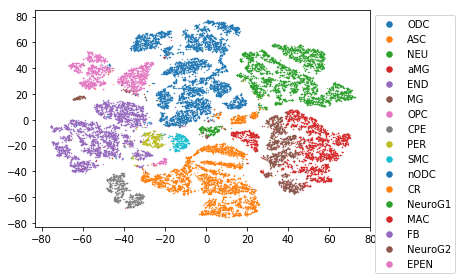

In [154]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
compressed = CSC.compresseds[0].copy()
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = TSNE(n_components=2).fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=CSC.cells)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.1,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

In [159]:
binary = pd.DataFrame(CSC.survivors[0],index=CSC.genes)
binary[np.max(binary,axis=1)==1]

0    1    2    3    4    5    6    7    8    9    10   11  \
S100a9         0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Ccdc153        0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Mki67          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
Gal            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
Ube2c          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
Hmmr           0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Fam159b        0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Mustn1         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
Vip            0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Pln            0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
Cbr2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
Olfr558        0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
P2ry14         0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
Gzma           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Slc6a20a       0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
Ccl8           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Esm1           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Kcnj13         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
Tmem72         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
H19            1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Slc32a1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
Msr1           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Mgl2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
Heyl           1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Ccl12          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
Ccdc135        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
Ccnf           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Tac2           0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
Il12b          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
RP23-45G16.5   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Hlf            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Shisa5         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
Shmt1          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Bmp1           0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
Ptplad2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4931406P16Rik  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AK010878       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
Gm129          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Mrps36-ps1     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Ddb2           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
Slc25a27       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
Map1lc3a       0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Rpsa-ps10      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Wdr66          0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Adcy10         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
Abhd8          0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
Ankrd42        1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Rab40c         0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
Ptar1          0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
Mogs           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Armcx4      

In [160]:
for bit in binary.columns:
    temp = list(binary[binary[bit]==1].index)
    b=0
    for i in temp:
        if 'blank' in i:
            b+=1
    print(bit,b)

0 0
1 0
2 0
3 1
4 1
5 0
6 1
7 0
8 0
9 0
10 1
11 0
12 0
13 0
14 1
15 0
16 0
17 0


In [161]:
temp

['Gzma',
 'Ccl8',
 'Hs6st3',
 'AI662270',
 'C3ar1',
 'Epha7',
 'Mrps6',
 'Hck',
 'Sdpr',
 'Rgs4',
 'Aldh1l1',
 'Ccl2',
 '4833424O15Rik',
 'Vim',
 'Maml3',
 'Sfxn5',
 'Arhgap19',
 'Ldb2',
 'Nnat',
 'E130309D14Rik',
 'Pstpip2',
 'Podxl2',
 'Jph1',
 'Tmem86a',
 'Rbms3',
 'Esyt3',
 'Pde7b',
 'Trip10',
 'Wnt5b',
 'Gm26510',
 'Zc2hc1a',
 'Cyth3',
 'Npr1',
 'Man2a1',
 'Ccdc85b',
 'Chd3',
 'Sh3bp2',
 'Mllt4',
 'Tsc22d3',
 'Sepw1',
 'Cep112',
 'Smpd2',
 'Slc35e4',
 'Shmt1',
 'Ankrd42',
 'Znhit3']

In [136]:
import anndata
import scanpy as sc
post_adata = anndata.AnnData(X=compressed)
post_adata.obsm["compressed"] = compressed
post_adata.obsm["cell_type"] = [i.split('_')[-1] for i in CSC.cells]
sc.pp.neighbors(post_adata, use_rep="compressed", n_neighbors=15)
sc.tl.umap(post_adata, min_dist=0.1)
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(post_adata, color=["cell_type"], ax=ax, show=show_plot)

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


ModuleNotFoundError: No module named 'scanpy'

In [ ]:
plt.scatter(compressed[:,0],compressed[:,1],s=1,alpha=0.5)
plt.show()

0.17835633424502725
0.9638843244772999


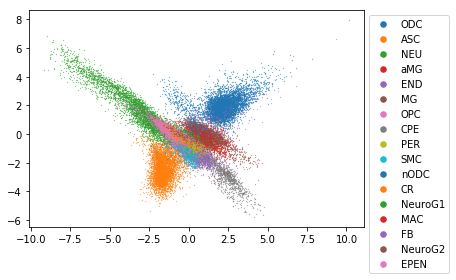

In [171]:
CSC.nbits = 18
CSC.npos = 50
species = np.zeros((CSC.ngenes,CSC.nbits))
for i in range(CSC.nbits):
    x = random.sample(list(range(CSC.ngenes)),CSC.npos)
    species[x,i] = 1
compressed = CSC.generate_compressed(species)
metric,correlation = CSC.calculate_metric(compressed)
print(metric)
print(correlation)
pca = PCA(n_components=2)
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

0.1799154939327327
0.9648877360468937


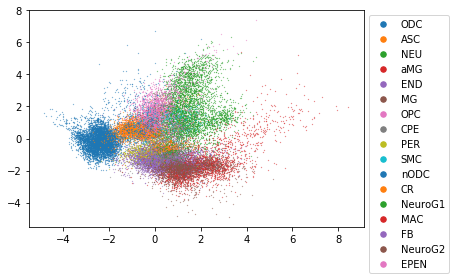

In [172]:
CSC.nbits = 9
CSC.npos = 50
species = np.zeros((CSC.ngenes,CSC.nbits))
for i in range(CSC.nbits):
    x = random.sample(list(range(CSC.ngenes)),CSC.npos)
    species[x,i] = 1
compressed = CSC.generate_compressed(species)
metric,correlation = CSC.calculate_metric(compressed)
print(metric)
print(correlation)
pca = PCA(n_components=2)
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

0.42572312324661504
0.7786824642407957


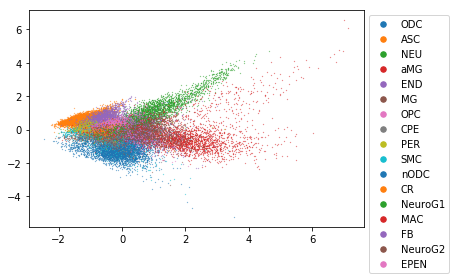

In [173]:
CSC.nbits = 2
CSC.npos = 50
species = np.zeros((CSC.ngenes,CSC.nbits))
for i in range(CSC.nbits):
    x = random.sample(list(range(CSC.ngenes)),CSC.npos)
    species[x,i] = 1
compressed = CSC.generate_compressed(species)
metric,correlation = CSC.calculate_metric(compressed)
print(metric)
print(correlation)
pca = PCA(n_components=2)
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

0.16883877187080856
0.9704635366172235


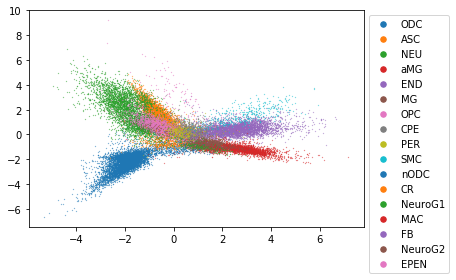

In [174]:
CSC.nbits = 18
CSC.npos = 1
species = np.zeros((CSC.ngenes,CSC.nbits))
for i in range(CSC.nbits):
    x = random.sample(list(range(CSC.ngenes)),CSC.npos)
    species[x,i] = 1
compressed = CSC.generate_compressed(species)
metric,correlation = CSC.calculate_metric(compressed)
print(metric)
print(correlation)
pca = PCA(n_components=2)
compressed_df = pd.DataFrame(compressed,index=CSC.cells)
x = StandardScaler().fit_transform(compressed_df)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
for cell_type in principalDf['cell_type'].unique():
    temp_df = principalDf[principalDf['cell_type']==cell_type]
    plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
for i in range(len(lgnd.legendHandles)):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()

2
0.45758134106672305
0.7770267365929378


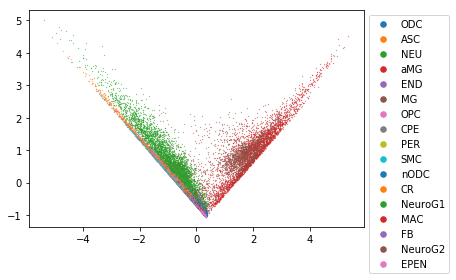

3
0.36861364300126315
0.8476231692248027


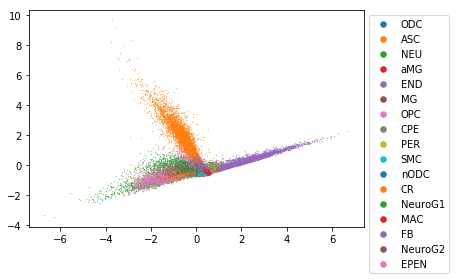

4
0.33421316102504584
0.875664792797183


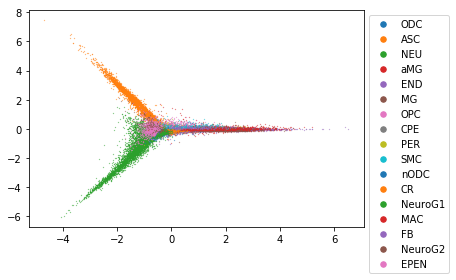

5
0.2531770130762639
0.9276970457388611


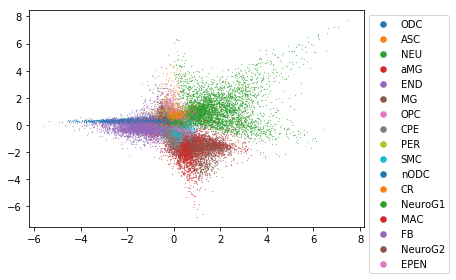

6
0.2610602035438222
0.9150842627780207


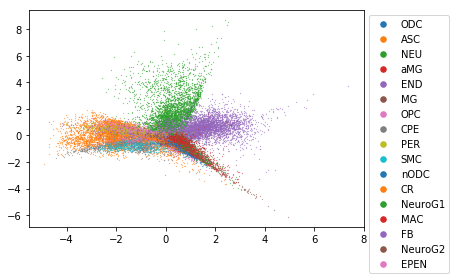

7
0.224020474907784
0.9449255570232484


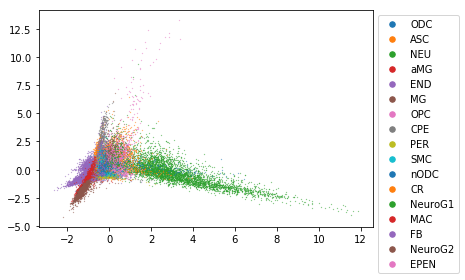

8
0.20093152680616225
0.9560552897893586


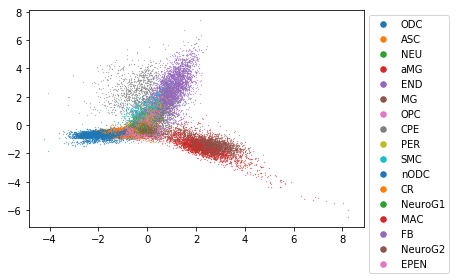

9
0.2319015179010373
0.9348866479611804


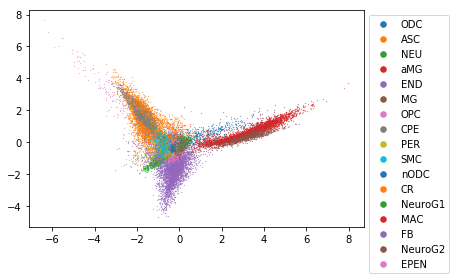

10
0.21199299469947924
0.9481870030962591


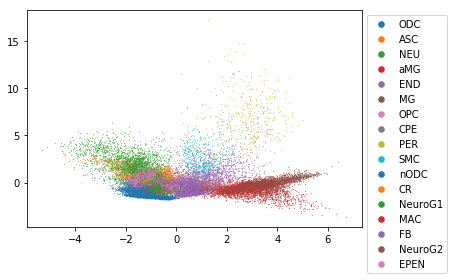

11
0.20326529009980676
0.9585319626470284


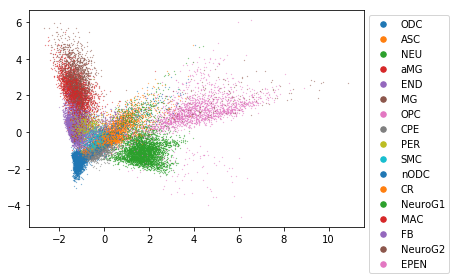

12
0.20153258115082312
0.9569287854290746


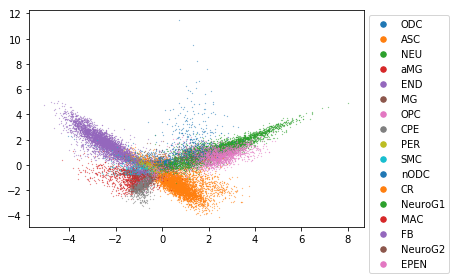

13
0.20672724905774803
0.9600968743857993


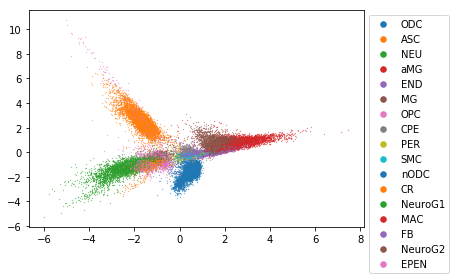

14
0.21021544600068287
0.9561774820164911


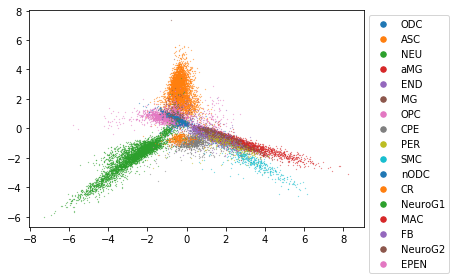

15
0.18396012710194912
0.9644894260088969


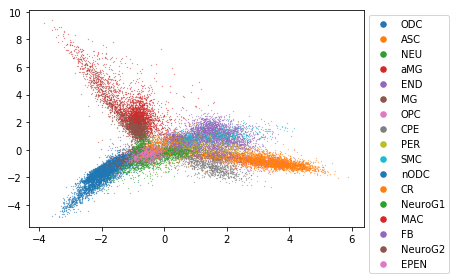

16
0.19791461885991432
0.9594051983388391


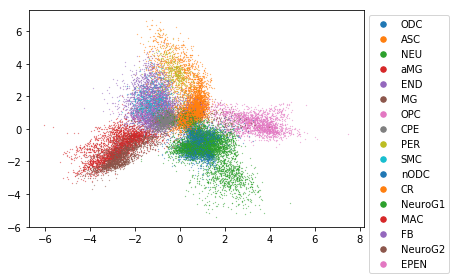

17
0.19550703702013725
0.9603779371142496


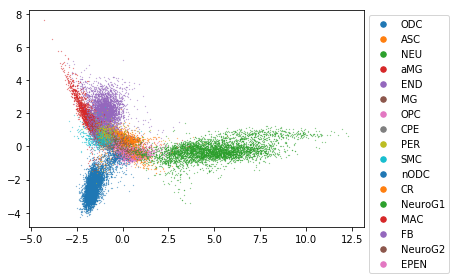

18
0.18708381176852398
0.9635375858713243


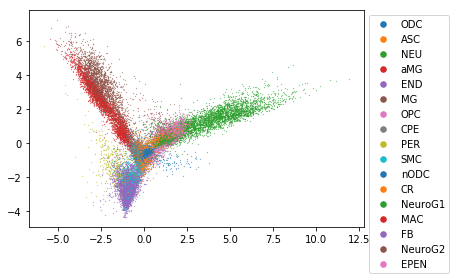

19
0.21065120281972755
0.9547008547826065


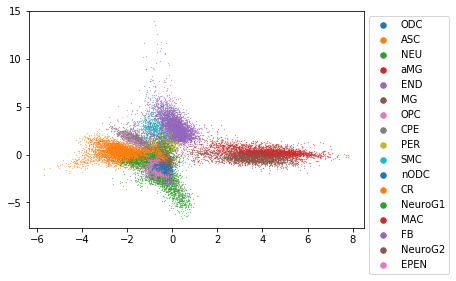

In [176]:
for i in range(2,20):
    CSC.nbits = i
    print(i)
    CSC.npos = 1
    species = np.zeros((CSC.ngenes,CSC.nbits))
    for i in range(CSC.nbits):
        x = random.sample(list(range(CSC.ngenes)),CSC.npos)
        species[x,i] = 1
    compressed = CSC.generate_compressed(species)
    metric,correlation = CSC.calculate_metric(compressed)
    print(metric)
    print(correlation)
    pca = PCA(n_components=2)
    compressed_df = pd.DataFrame(compressed,index=CSC.cells)
    x = StandardScaler().fit_transform(compressed_df)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
    principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
    for cell_type in principalDf['cell_type'].unique():
        temp_df = principalDf[principalDf['cell_type']==cell_type]
        plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
    lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
    for i in range(len(lgnd.legendHandles)):
        lgnd.legendHandles[i]._sizes = [30]
    plt.show()

2
0.4903170427035197
0.7336224666436415


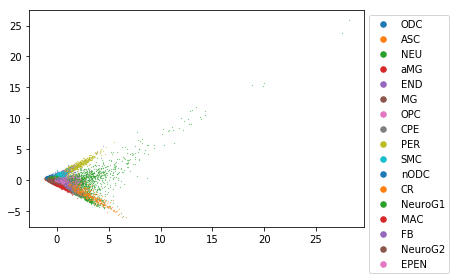

3
0.35222759518577457
0.8489390364709958


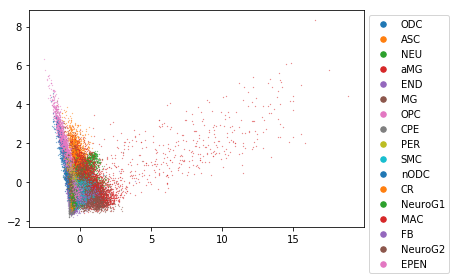

4
0.2734163089076692
0.903487347141989


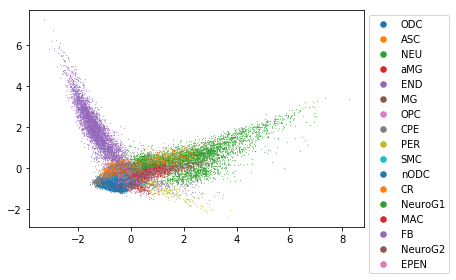

5
0.238004273256924
0.9290301996339374


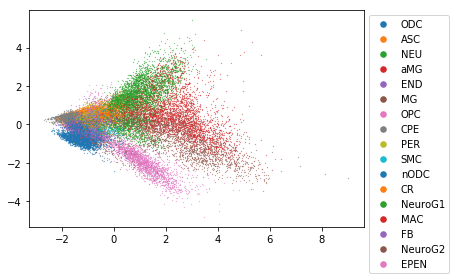

6
0.21874078150498133
0.9427912524554316


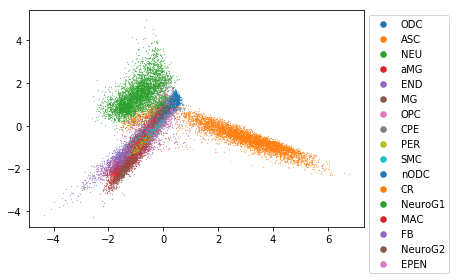

7
0.19953348251027153
0.9531733639583896


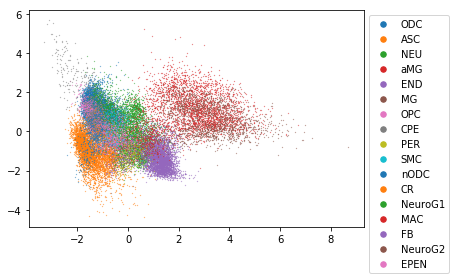

8
0.19781903747626878
0.9601159554735548


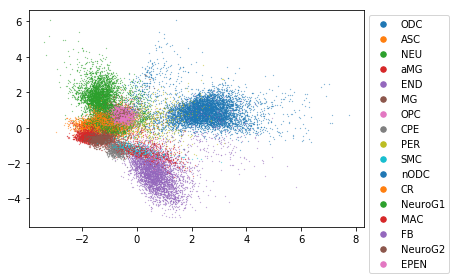

9
0.1988756971657299
0.9559737301524776


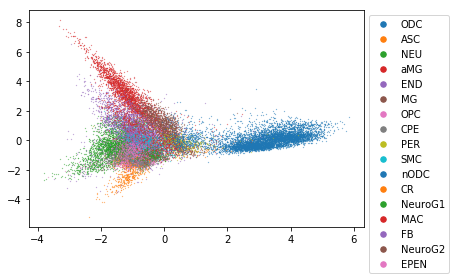

10
0.2070391460271665
0.9520272594657214


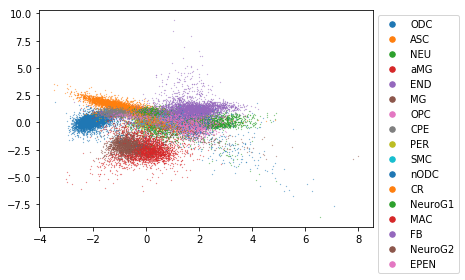

11
0.2001159721178041
0.9549592336197159


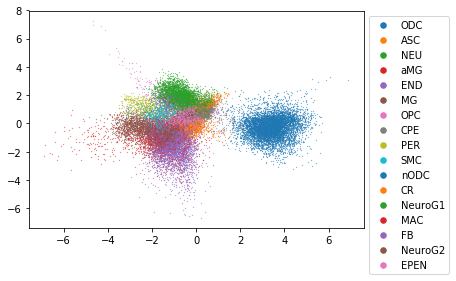

12
0.165393368657077
0.9714676787498076


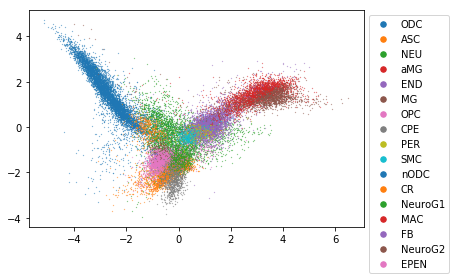

13
0.16951936821879277
0.9704244268933953


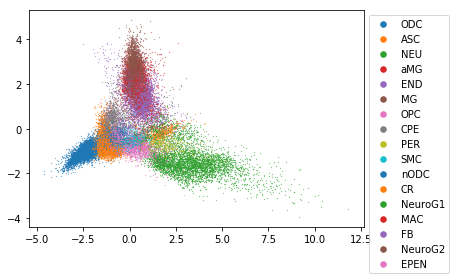

14
0.19049876406086771
0.9603223044234726


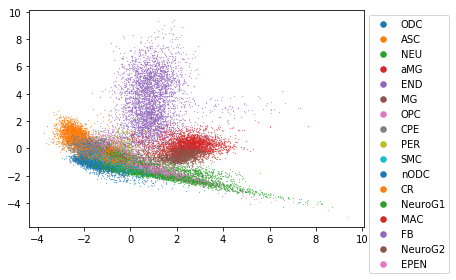

15
0.18292394054702896
0.9640305818466259


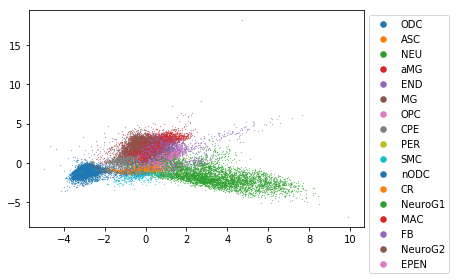

16
0.1609281882744478
0.9722669638965886


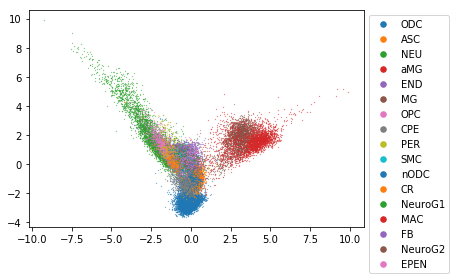

17
0.1634126526634522
0.9711933871234745


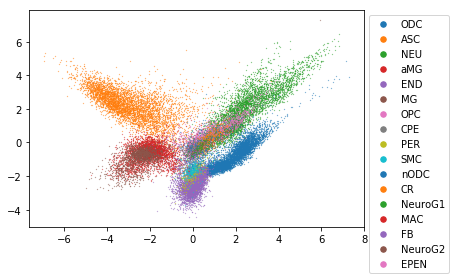

18
0.17765370073198503
0.9655297693920326


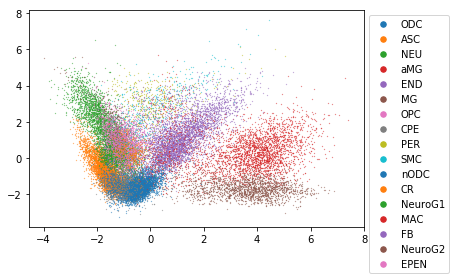

19
0.21414847175260135
0.9519988997878357


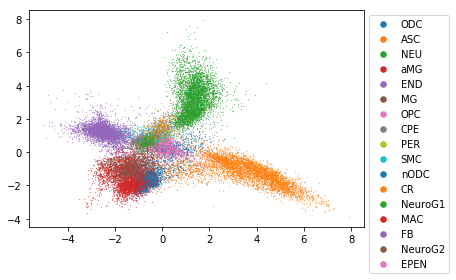

In [178]:
CSC.npos = 10
for i in range(2,20):
    CSC.nbits = i
    print(i)
    species = np.zeros((CSC.ngenes,CSC.nbits))
    for i in range(CSC.nbits):
        x = random.sample(list(range(CSC.ngenes)),CSC.npos)
        species[x,i] = 1
    compressed = CSC.generate_compressed(species)
    metric,correlation = CSC.calculate_metric(compressed)
    print(metric)
    print(correlation)
    pca = PCA(n_components=2)
    compressed_df = pd.DataFrame(compressed,index=CSC.cells)
    x = StandardScaler().fit_transform(compressed_df)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
    principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
    for cell_type in principalDf['cell_type'].unique():
        temp_df = principalDf[principalDf['cell_type']==cell_type]
        plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
    lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
    for i in range(len(lgnd.legendHandles)):
        lgnd.legendHandles[i]._sizes = [30]
    plt.show()

2
0.3818330528599652
0.832267765765099


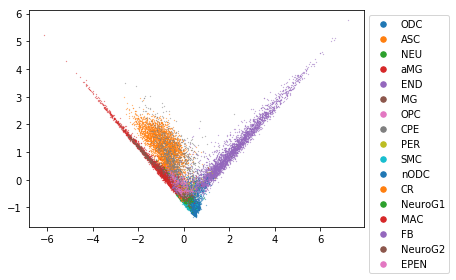

3
0.3258034849874497
0.8661710429719134


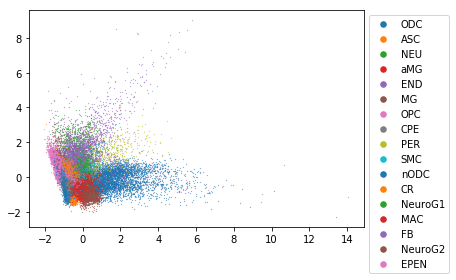

4
0.253241763548068
0.9215357687283667


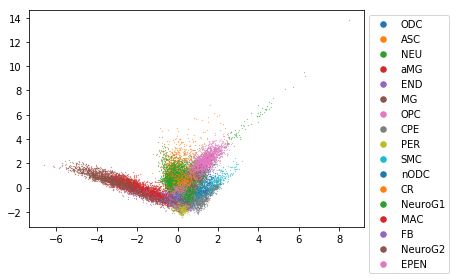

5
0.23605792294790148
0.9337682343393395


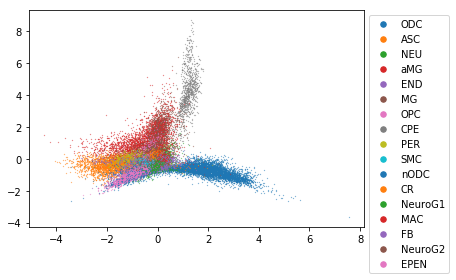

6
0.21842132756068497
0.9376272540816887


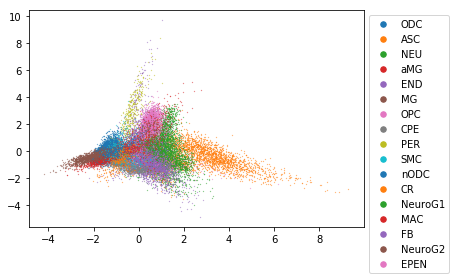

7
0.1983766240401585
0.9577129955113528


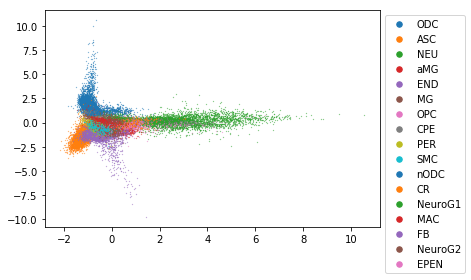

8
0.17785047992911046
0.9648245132993833


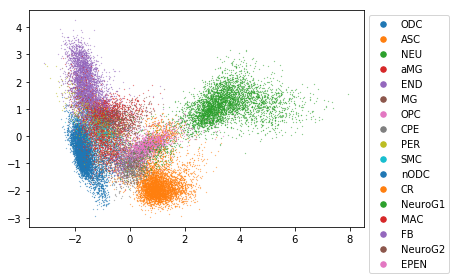

9
0.1787564403032027
0.9651893005660344


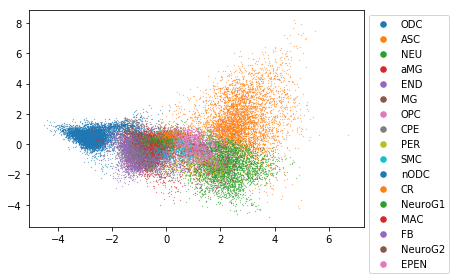

10
0.19323710799738156
0.9601172477416332


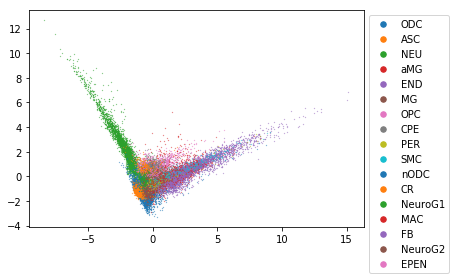

11
0.18323046916180977
0.964636629606033


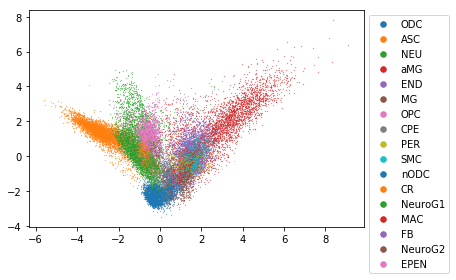

12
0.16934062479013084
0.9696821181937048


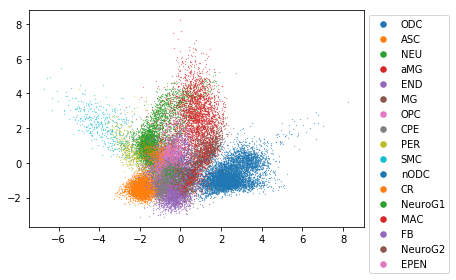

13
0.1717355069327396
0.9677625162243214


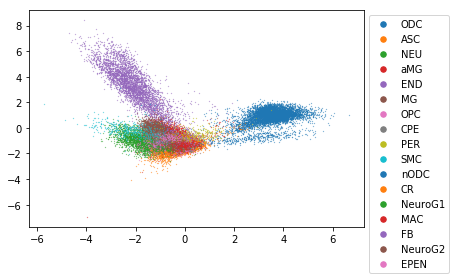

14
0.1720377454875053
0.9685659656863406


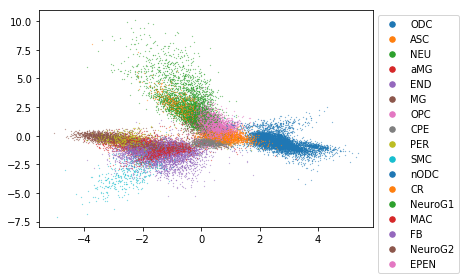

15
0.18021327721498615
0.966117865341205


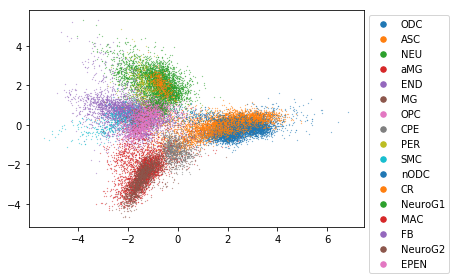

16
0.1611881058489269
0.9725564699408212


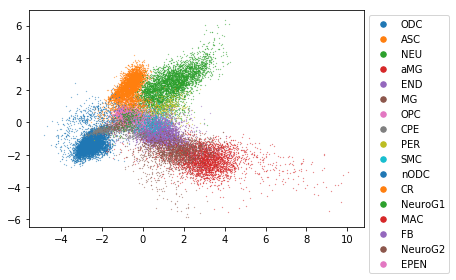

17
0.16401779603432853
0.971881965055249


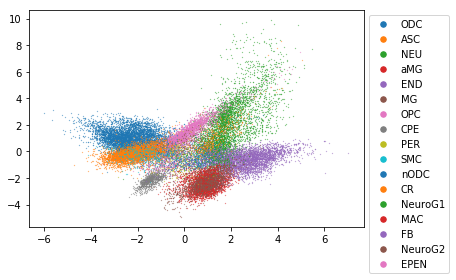

18
0.17835902617473634
0.9651037869845459


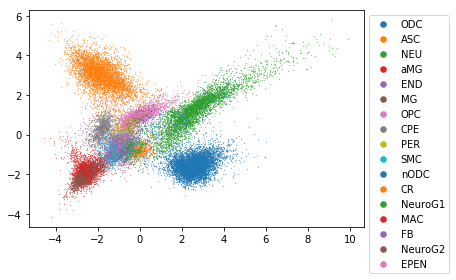

19
0.1560380679972292
0.9744774925047214


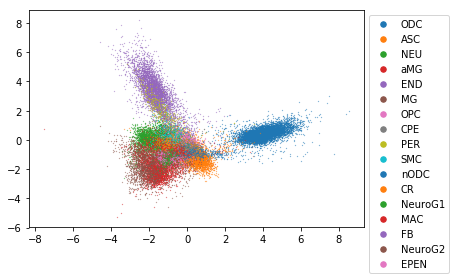

In [177]:
CSC.npos = 20
for i in range(2,20):
    CSC.nbits = i
    print(i)
    species = np.zeros((CSC.ngenes,CSC.nbits))
    for i in range(CSC.nbits):
        x = random.sample(list(range(CSC.ngenes)),CSC.npos)
        species[x,i] = 1
    compressed = CSC.generate_compressed(species)
    metric,correlation = CSC.calculate_metric(compressed)
    print(metric)
    print(correlation)
    pca = PCA(n_components=2)
    compressed_df = pd.DataFrame(compressed,index=CSC.cells)
    x = StandardScaler().fit_transform(compressed_df)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
    principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
    for cell_type in principalDf['cell_type'].unique():
        temp_df = principalDf[principalDf['cell_type']==cell_type]
        plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
    lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
    for i in range(len(lgnd.legendHandles)):
        lgnd.legendHandles[i]._sizes = [30]
    plt.show()

2
0.40443310837935487
0.8096061378580027


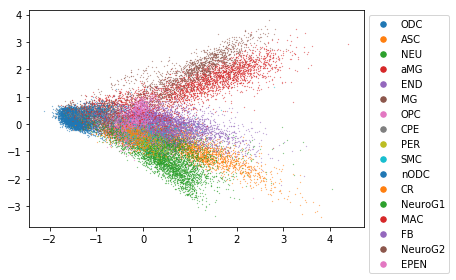

3
0.32966218550390225
0.8692445766429935


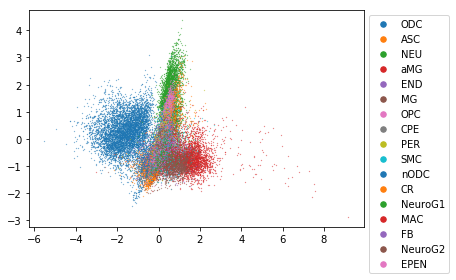

4
0.28388798212222044
0.8944296065732174


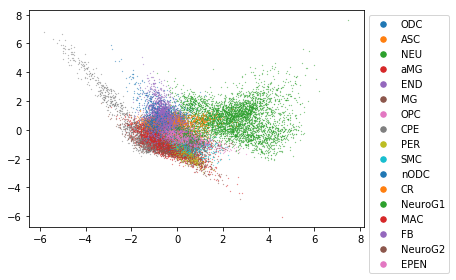

5
0.23175207315213203
0.93468738719429


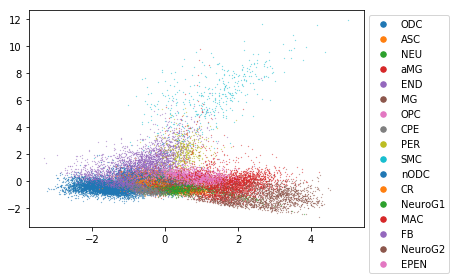

6
0.2124750056288453
0.9479526402650541


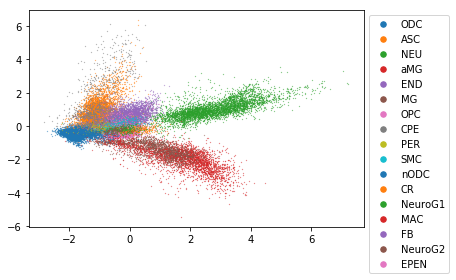

7
0.2181450154401425
0.9437167400169308


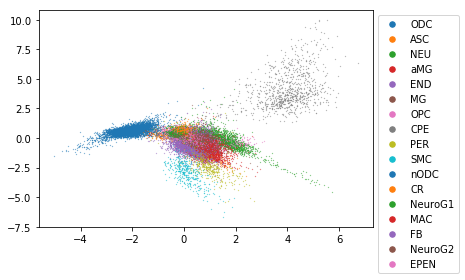

8
0.18409737349013022
0.9611778516011129


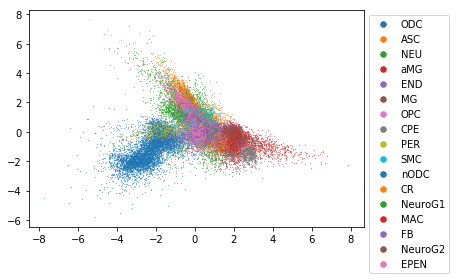

9
0.177271108855507
0.9657596032656649


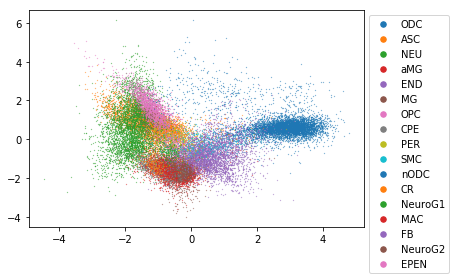

10
0.19857012445431615
0.9527978406431813


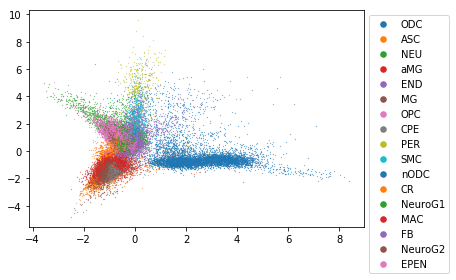

11
0.17639133333012366
0.968065204999647


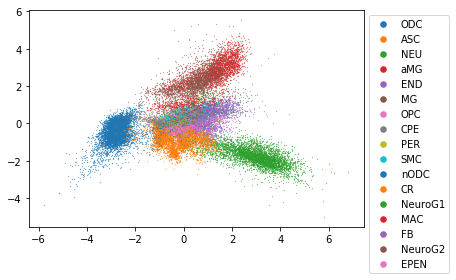

12
0.17511747432670122
0.966923224970902


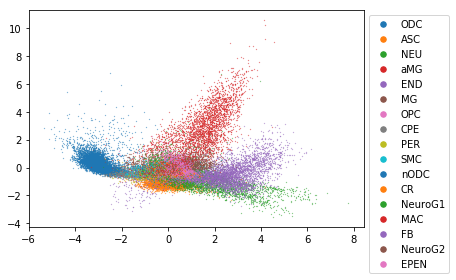

13
0.18486940060923546
0.9627458498028757


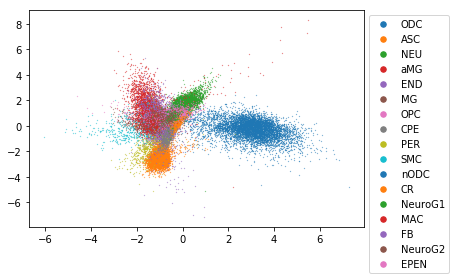

14
0.17299269097628112
0.9671515355805024


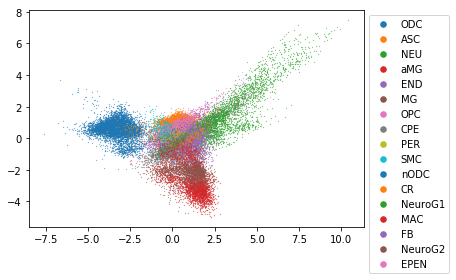

15
0.1602950280439995
0.9729274241622258


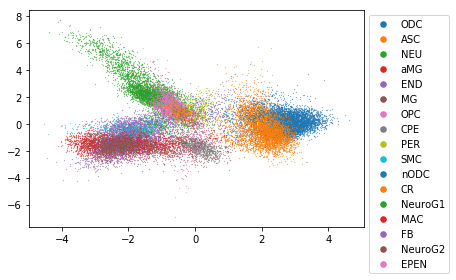

16
0.16957936131554588
0.9680554562811076


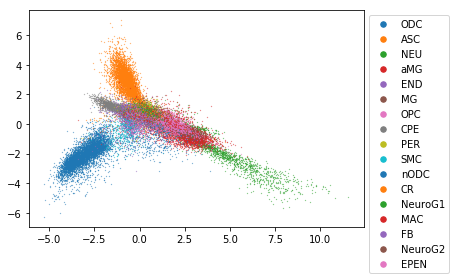

17
0.18442653316718294
0.9609554886374293


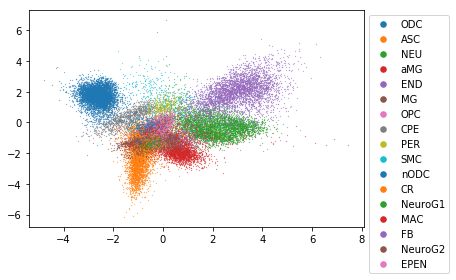

18
0.17157904938225332
0.9684749973986149


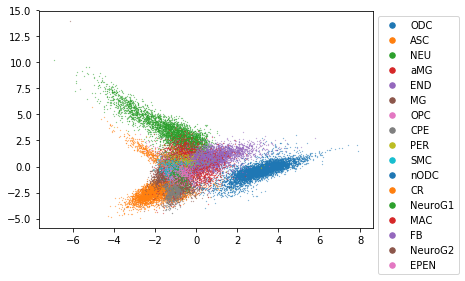

19
0.17627801524090897
0.9657795568930161


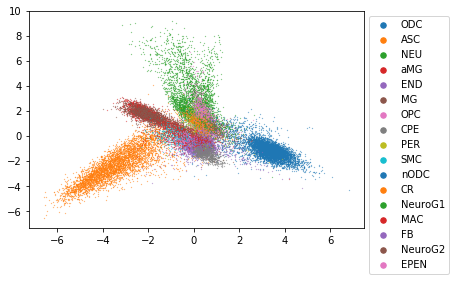

In [179]:
CSC.npos = 50
for i in range(2,20):
    CSC.nbits = i
    print(i)
    species = np.zeros((CSC.ngenes,CSC.nbits))
    for i in range(CSC.nbits):
        x = random.sample(list(range(CSC.ngenes)),CSC.npos)
        species[x,i] = 1
    compressed = CSC.generate_compressed(species)
    metric,correlation = CSC.calculate_metric(compressed)
    print(metric)
    print(correlation)
    pca = PCA(n_components=2)
    compressed_df = pd.DataFrame(compressed,index=CSC.cells)
    x = StandardScaler().fit_transform(compressed_df)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents,index=SCMatrix.columns)
    principalDf['cell_type'] = [i.split('_')[-1] for i in principalDf.index]
    for cell_type in principalDf['cell_type'].unique():
        temp_df = principalDf[principalDf['cell_type']==cell_type]
        plt.scatter(temp_df[0],temp_df[1],s=0.05,alpha=1,label=cell_type)
    lgnd = plt.legend(bbox_to_anchor=(1, 1, 0, 0))
    for i in range(len(lgnd.legendHandles)):
        lgnd.legendHandles[i]._sizes = [30]
    plt.show()

In [ ]:
# 2d Scan 30 replicates 
# npos vs nbits
